# Objective

1. Data Import and Inspection.
2. Data Cleaning and Filtering.
3. Showing Histograph of related data.
4. Distribution of bike consumers by Age-Group'
5. Total Revenue by Year.
6. Most Profitable Year.
7. Most Profitable Month.
8. Total Orders Based on Gender.
9. Highest Revenue Based on Year.
10.Highest ROI by year.
11.Distribution of Revenue by Year.
12.Revenue vs Profit vs Cost by Year.
13.Highest Revenue Based on Country.
14.Distribution of Revenue by Country.
15.Revenue vs Profit vs Cost by Country.
16.Highest Revenue Based on Statess.
17.Distribution of Revenue by States.
18.Profit By Product Category.
19.Profit By Product Sub-Category.
20.Correlation.


# Data Import and Inspection

__Some additional information on Features/Columns__:

The dataset consists of the following features:

1. Date = Date of the order
2. Day = Day of the order
3. Month = Month of the order
4. Year = Year of the order
5. Customer_Age = The Age of customer
6. Age_Group = Age range for the customer
7. Customer_Gender = The customer gender
8. Country = The country where the order was made
9. State = The state where the order was made
10.Product_Category = Product category for each order
11.Sub_Category = Product sub category for each order
12.Product = The product for each order
13.Order_Quantity = Quantity of the product
14.Unit_Cost = Cost of inventory holding cost
15.Unit_Price = The price of the product
16.Profit = Nett profit of each order
17.Cost = The sum cost of all product for each order
18.Revenue = Total revenue of each order

**IMPORTING REQUIRED LIBRARIES**

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Read the Data

In [3]:
df = pd.read_csv('Bike Sales In Europe.csv')


# Data Audit

__First five rows of the dataset__

In [4]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


__Last five rows of the dataset__

In [5]:
df.tail()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260
113035,2016-03-04,4,March,2016,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",23,24,64,655,552,1207


__Shape of the dataset__

In [6]:
df.shape

(113036, 18)

__A consice summary of the dataset__

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

# Data Cleaning and Filtering

In [8]:
#Change the date column in datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
#_Columns present in the dataset
df.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

In [10]:
#Delete columns
df.drop(columns=['Profit','Revenue','Day'], axis=1, inplace=True)

__Create Revenue and Profit columns__

In [11]:
Revenue= df['Order_Quantity']*df['Unit_Price']
df['Revenue'] = Revenue

In [12]:
Profit = df['Revenue'] - df['Cost']
df['Profit']= Profit

In [13]:
#Change column name
df['Customer_Gender'].replace('M','Male', inplace=True)
df['Customer_Gender'].replace('F','Female', inplace=True)
df.head(2)

,Date,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Cost,Revenue,Profit
0,2013-11-26,November,2013,19,Youth (<25),Male,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,360,960,600
1,2015-11-26,November,2015,19,Youth (<25),Male,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,360,960,600


__Checking missing values__

In [14]:
df.isnull().sum()

Date                0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Cost                0
Revenue             0
Profit              0
dtype: int64

# Statistical Summary

In [15]:
df.describe()

,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Cost,Revenue,Profit
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,2014.401739,35.919212,11.901660,267.296366,452.938427,469.318695,842.000053,372.681358
std,1.272510,11.021936,9.561857,549.835483,922.071219,884.866118,1466.202934,595.080571
min,2011.000000,17.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000
25%,2013.000000,28.000000,2.000000,2.000000,5.000000,28.000000,70.000000,39.000000
50%,2014.000000,35.000000,10.000000,9.000000,24.000000,108.000000,245.000000,135.000000
75%,2016.000000,43.000000,20.000000,42.000000,70.000000,432.000000,880.000000,432.000000
max,2016.000000,87.000000,32.000000,2171.000000,3578.000000,42978.000000,69136.000000,26158.000000


# Showing Histograph of related data

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Customer_Age'}>],
       [<AxesSubplot:title={'center':'Order_Quantity'}>,
        <AxesSubplot:title={'center':'Unit_Cost'}>,
        <AxesSubplot:title={'center':'Unit_Price'}>],
       [<AxesSubplot:title={'center':'Cost'}>,
        <AxesSubplot:title={'center':'Revenue'}>,
        <AxesSubplot:title={'center':'Profit'}>]], dtype=object)

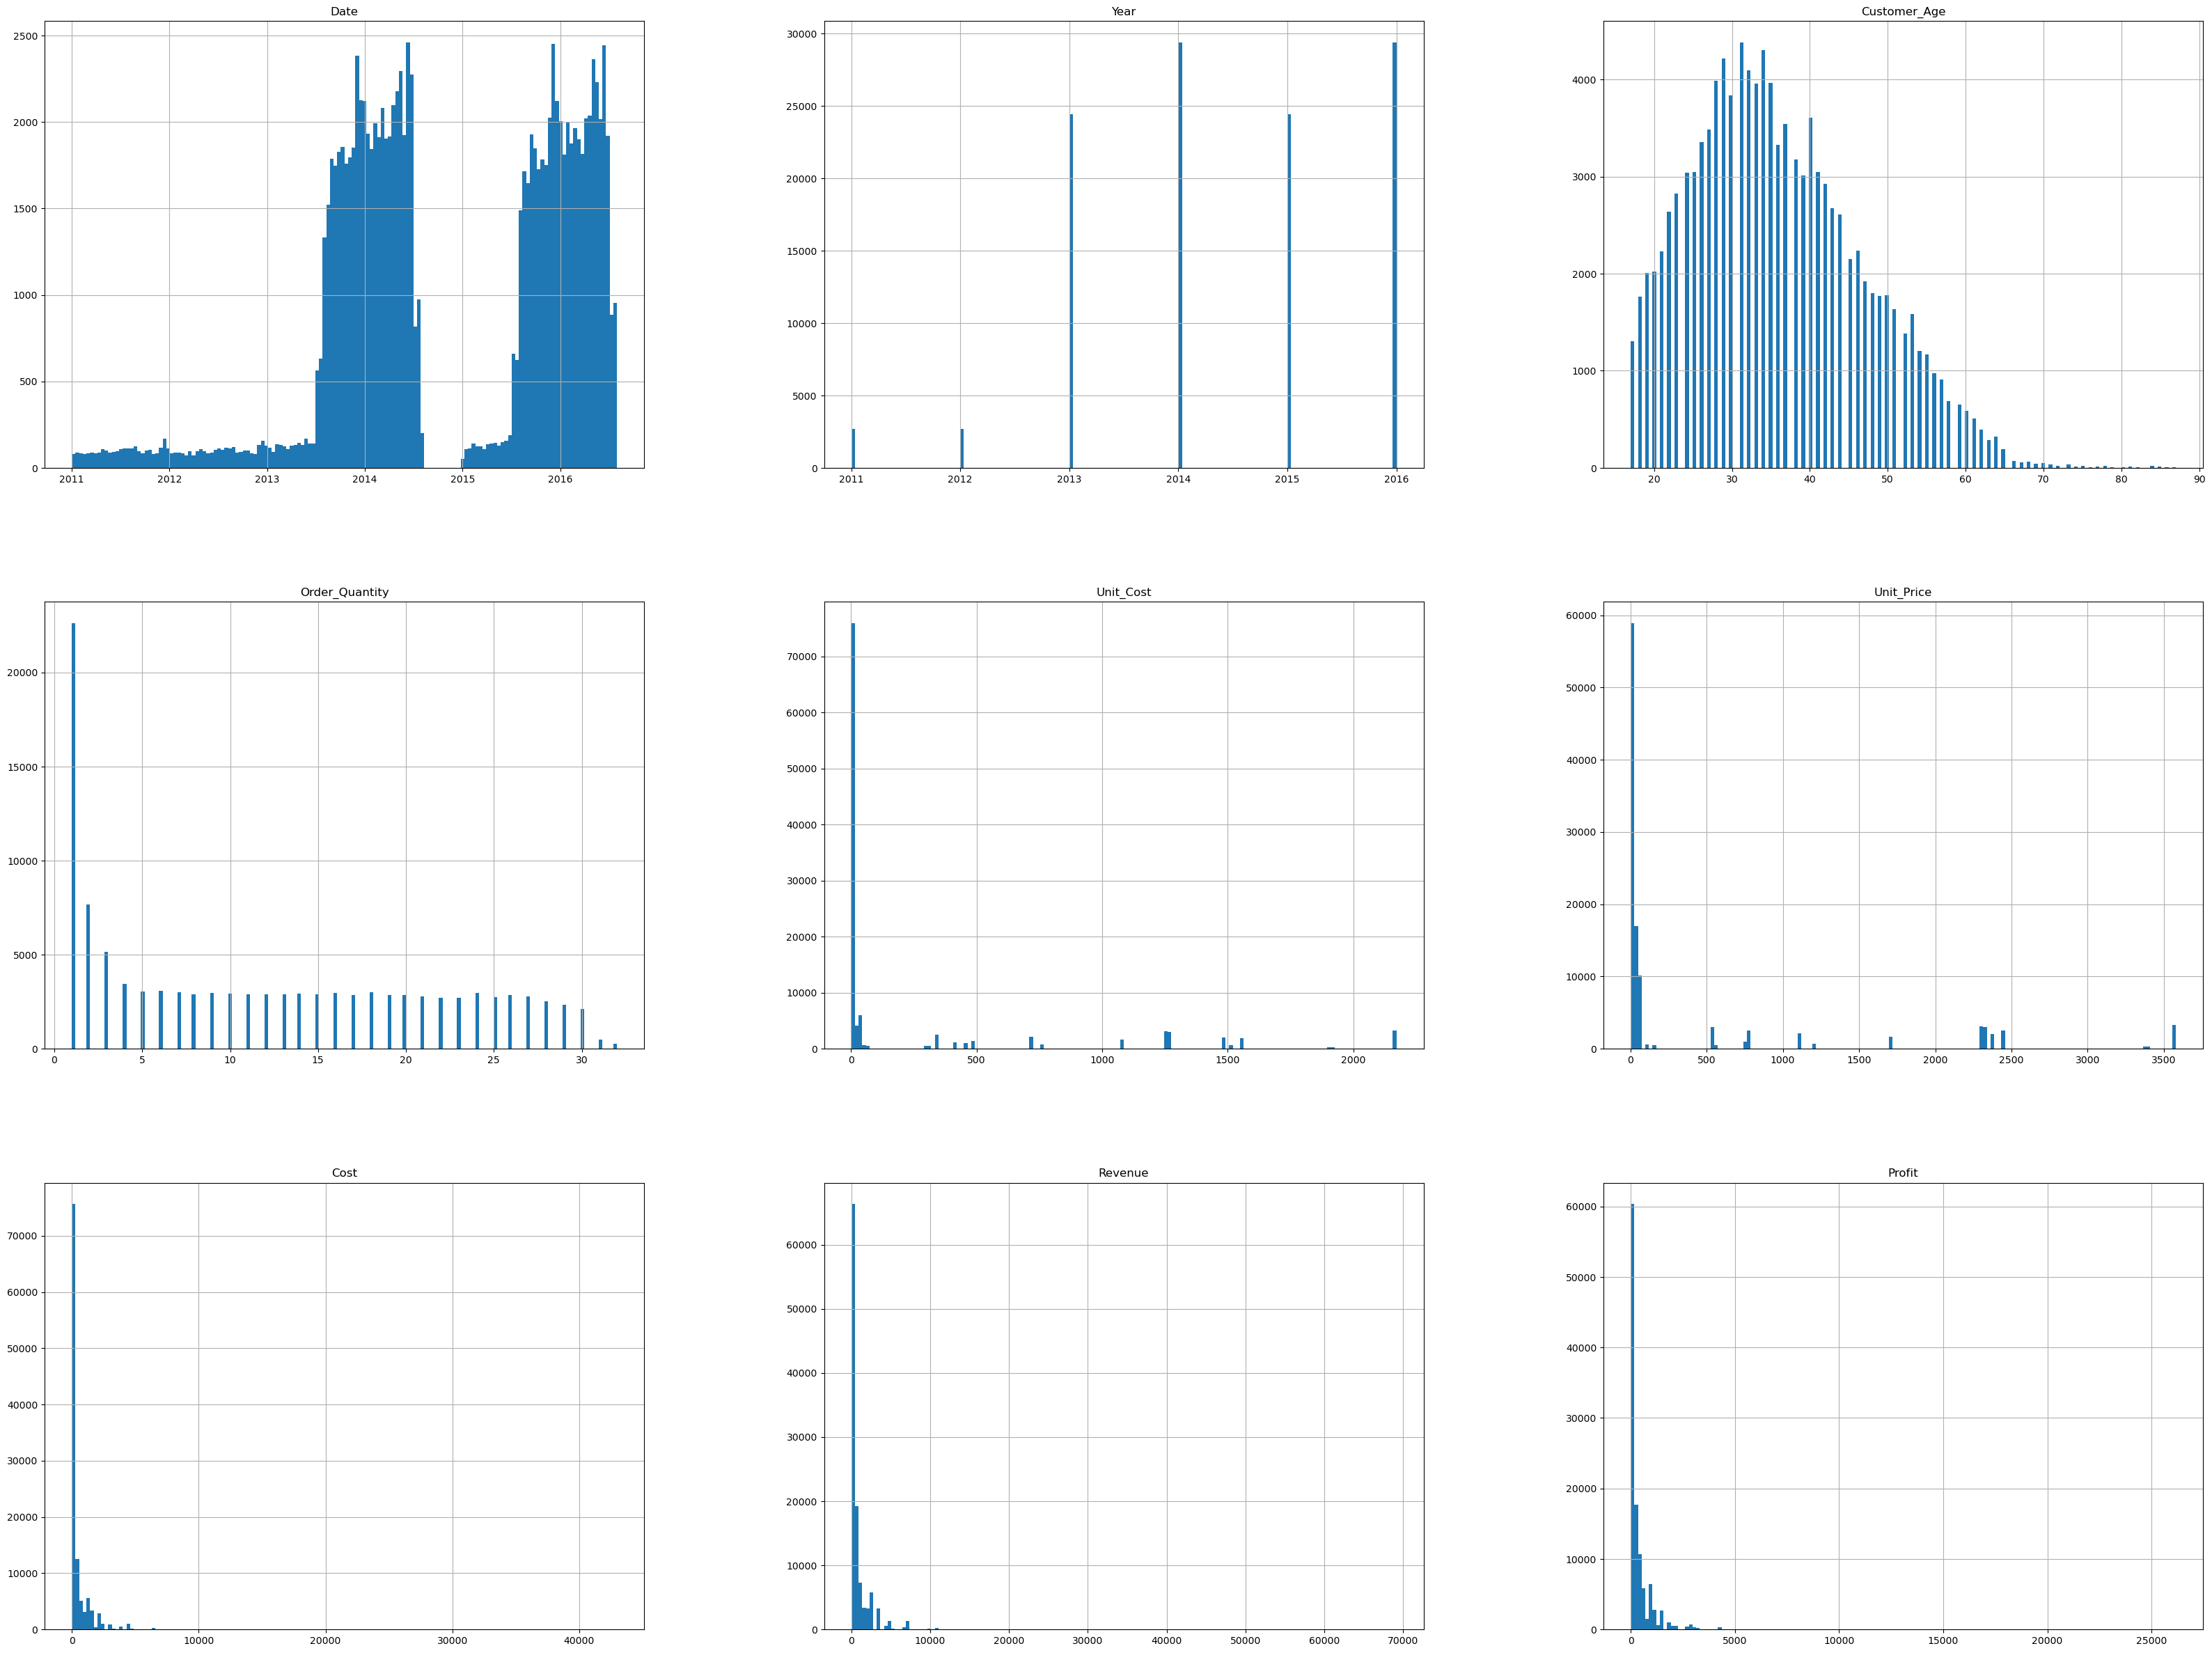

In [16]:
df.hist(figsize=(40,30),bins=150)

# **Distribution of bike Consumers by Age-Group**

In [17]:
Age_Group_Data = df['Age_Group'].value_counts()
Age_Group_Data

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

# **Analysing the distribution Using the Bar chart**

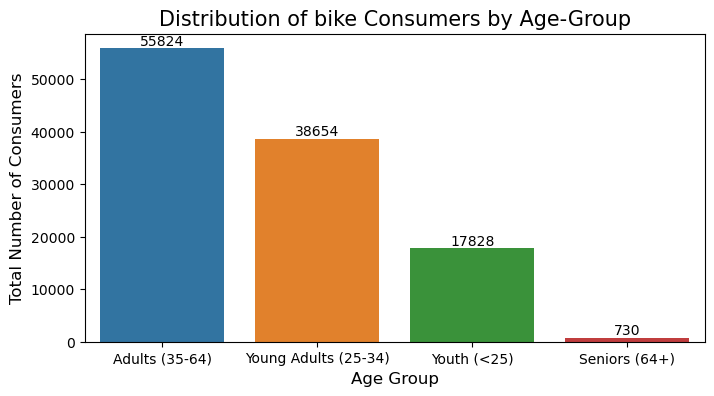

In [18]:

Age_Group = list(Age_Group_Data.index)


plt.figure(figsize=(8,4))
plt.title("Distribution of bike Consumers by Age-Group",fontsize = 15)
sns.barplot(x=Age_Group,y=Age_Group_Data)
for i in range(len(Age_Group_Data)):
    plt.text(i,Age_Group_Data[i],Age_Group_Data[i],ha='center',va = 'bottom')
plt.xlabel('Age Group', fontsize = 12)
plt.ylabel('Total Number of Consumers', fontsize = 12)
plt.show()

# **Analysing the distribution Using the Pie-chart**

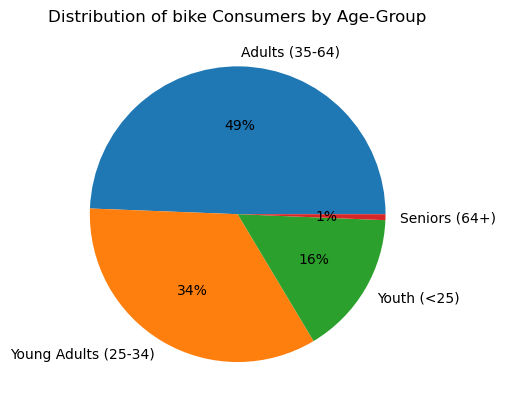

In [19]:
plt.pie(Age_Group_Data, labels=Age_Group, autopct='%.0f%%')
plt.title('Distribution of bike Consumers by Age-Group')
plt.show()

# **Total Revenue by Year**

In [20]:
Total_Revenue_Year = df.groupby('Year').sum()['Revenue'].sort_values(ascending=False)
Total_Revenue_Year


Year
2015    22405052
2016    19681769
2013    17028380
2014    15705990
2012    10289670
2011    10065457
Name: Revenue, dtype: int64

# Analysing the Distribution of Total Revenue using bargraph

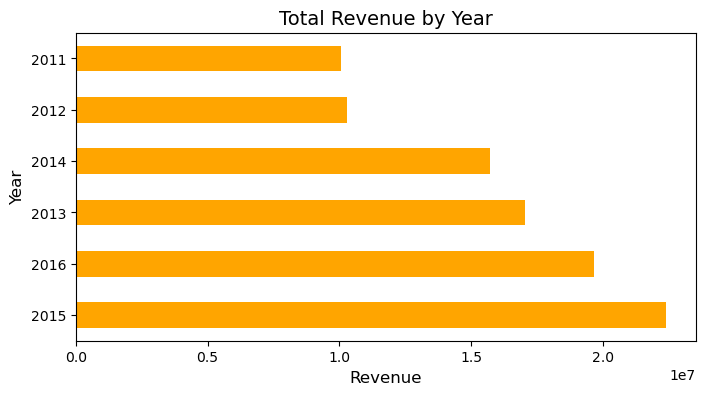

In [21]:
Total_Revenue_Year.plot(kind='barh', color='orange', rot=0, figsize=(8,4))

plt.title('Total Revenue by Year',fontsize=14)    
plt.xlabel('Revenue', fontsize = 12)
plt.ylabel('Year', fontsize = 12)
plt.show()

# **Most Profitable Year**

In [22]:
Most_Profitable_Year = df.groupby('Year').sum()['Profit'].sort_values(ascending=False)
Most_Profitable_Year


Year
2015    9909624
2016    9004332
2013    7747551
2014    7417353
2012    4065680
2011    3981870
Name: Profit, dtype: int64

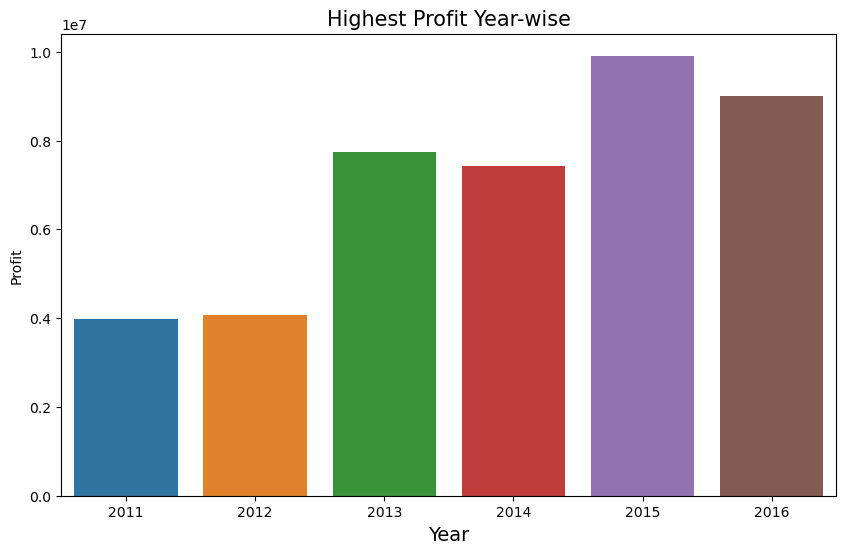

In [23]:
Year = list(Most_Profitable_Year.index)

plt.figure(figsize=(10,6))
plt.title("Highest Profit Year-wise",fontsize = 15)
sns.barplot(x=Year,y=Most_Profitable_Year)
plt.xlabel('Year', fontsize = 14)
plt.show()

# **Most Profitable Month**

In [24]:
Most_Profitable_Month = df.groupby('Month').sum()['Profit'].sort_values(ascending=False)


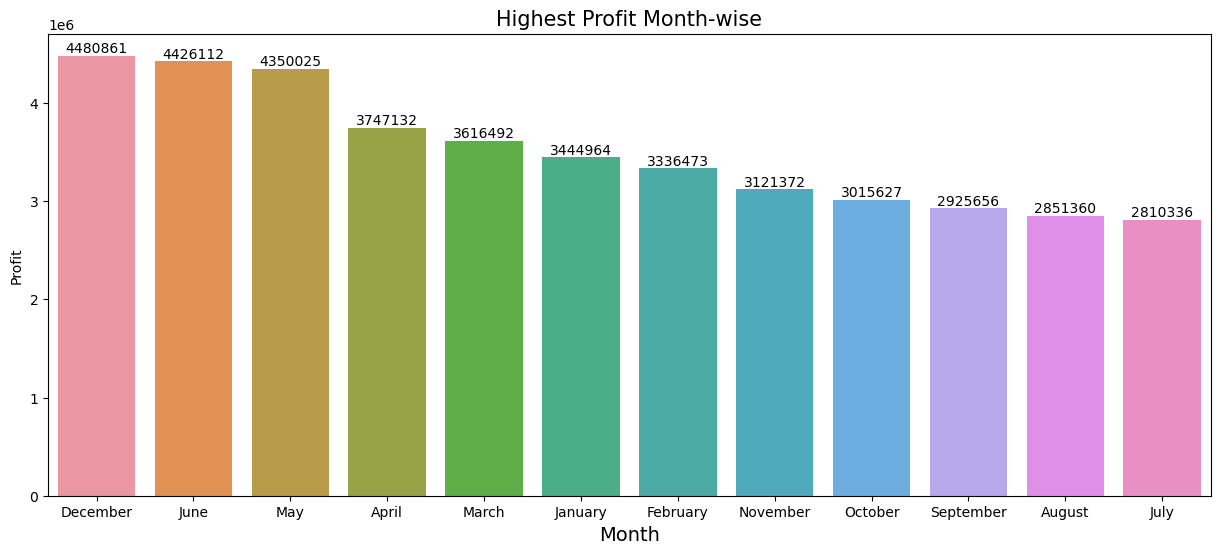

In [25]:
Month = list(Most_Profitable_Month.index)


plt.figure(figsize=(15,6))
plt.title("Highest Profit Month-wise",fontsize = 15)
sns.barplot(x=Month,y=Most_Profitable_Month)
for i in range(len(Most_Profitable_Month)):
    plt.text(i,Most_Profitable_Month[i],Most_Profitable_Month[i],ha='center',va = 'bottom')
plt.xlabel('Month', fontsize = 14)
plt.show()

# Revenue vs Profit vs Cost by Year

In [26]:
CPR = df.groupby('Year')[['Cost','Revenue','Profit']].sum()
CPR

,Cost,Revenue,Profit
Year,,,
2011,6083587,10065457,3981870
2012,6223990,10289670,4065680
2013,9280829,17028380,7747551
2014,8288637,15705990,7417353
2015,12495428,22405052,9909624
2016,10677437,19681769,9004332


Text(0, 0.5, 'Total')

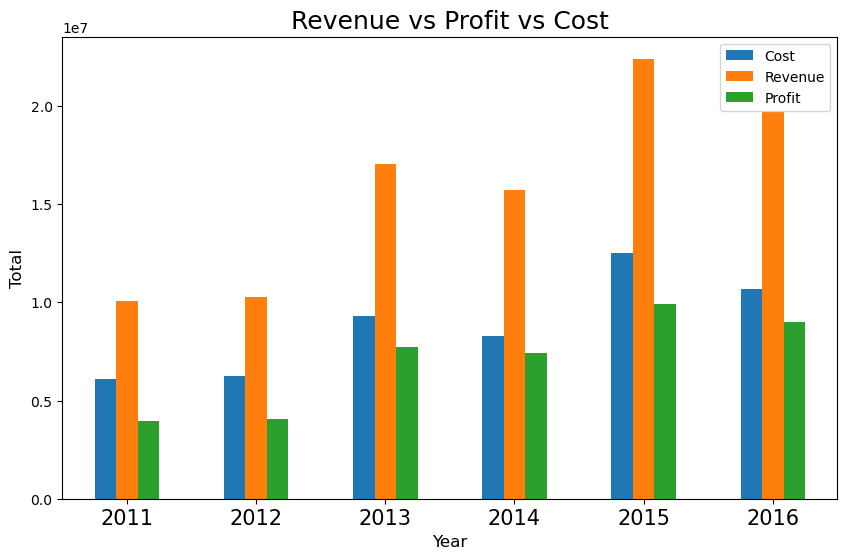

In [27]:
CPR.plot(kind='bar',figsize=(10, 6))
plt.title("Revenue vs Profit vs Cost",fontsize=18)
plt.xlabel("Year",fontsize=12)
plt.xticks(rotation = 0,fontsize = 15)
plt.ylabel("Total",fontsize=12)

# Create a column 'ROI' (Revenue/Cost)

In [30]:
df['ROI'] = df['Revenue']/df['Cost']
df.head(5)

,Date,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Cost,Revenue,Profit,ROI
0,2013-11-26,November,2013,19,Youth (<25),Male,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,360,960,600,2.666667
1,2015-11-26,November,2015,19,Youth (<25),Male,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,360,960,600,2.666667
2,2014-03-23,March,2014,49,Adults (35-64),Male,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1035,2760,1725,2.666667
3,2016-03-23,March,2016,49,Adults (35-64),Male,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,900,2400,1500,2.666667
4,2014-05-15,May,2014,47,Adults (35-64),Female,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,180,480,300,2.666667


# Highest ROI by year

In [64]:
Return = df.groupby('Year')[['ROI']].sum().sort_values(by='ROI',ascending=False)
Return

,ROI
Year,
2014,68926.121071
2016,68926.121071
2013,55876.612438
2015,55876.612438
2011,4407.953899
2012,4407.953899


Text(0, 0.5, 'ROI')

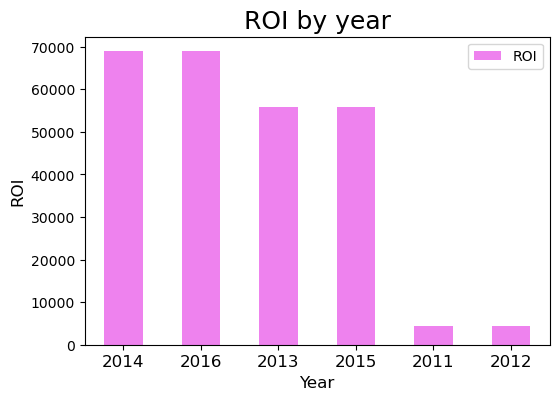

In [104]:
#Highest ROI by year displaying by Bar graph
Return.plot(kind='bar',figsize=(6, 4),color='violet')
plt.title("ROI by year",fontsize=18)
plt.xlabel("Year",fontsize=12)
plt.xticks(rotation = 0,fontsize = 12)
plt.ylabel("ROI",fontsize=12)

# **Total Orders Based on Gender**

In [76]:
Group_Gender=df.groupby('Customer_Gender').sum()['Order_Quantity'].sort_values(ascending=False)
gender = list(Group_Gender.index)
Count = list(Group_Gender.values)
Group_Gender

Customer_Gender
Male      699583
Female    645733
Name: Order_Quantity, dtype: int64

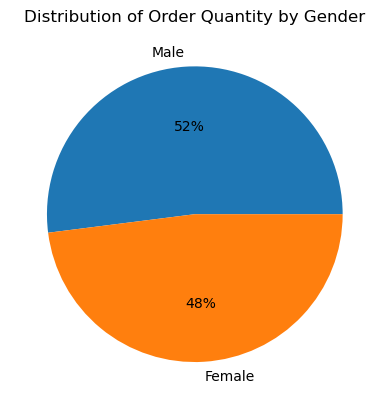

In [78]:
plt.pie(Count, labels=gender,  autopct='%.0f%%')
plt.title('Distribution of Order Quantity by Gender')
plt.show()

# **Highest Revenue Based on Country**

In [101]:
Group_country = df.groupby('Country').sum()['Revenue'].sort_values(ascending=False)

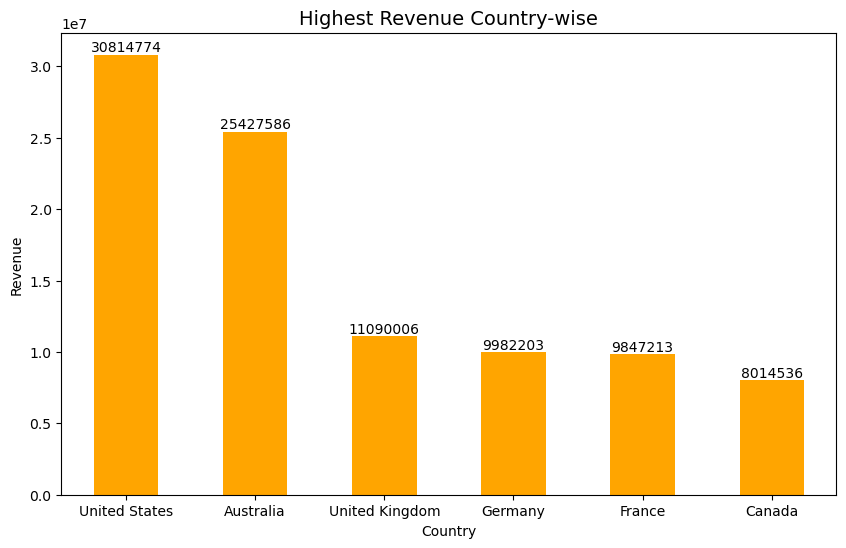

In [85]:
Group_country.plot(kind='bar', color='orange', rot=0, figsize=(10,6))

for i in range(len(Group_country)):
    plt.text(i,Group_country[i],Group_country[i],ha='center',va='bottom')
plt.title('Highest Revenue Country-wise',fontsize=14)    
plt.ylabel('Revenue')
plt.show()

# **Distribution of Revenue by Country**

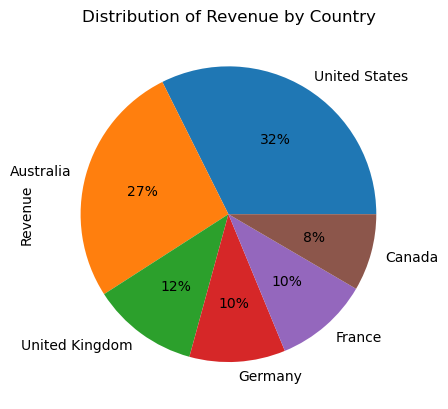

In [86]:
Group_country.plot(kind='pie', autopct='%.0f%%', title='Distribution of Revenue by Country')
plt.show()

# Revenue vs Profit vs Cost by Country

In [87]:
CPR1 = df.groupby('Country')[['Revenue', 'Profit', 'Cost']].sum()
CPR1

,Revenue,Profit,Cost
Country,,,
Australia,25427586,10901557,14526029
Canada,8014536,3796094,4218442
France,9847213,4294623,5552590
Germany,9982203,4363602,5618601
United Kingdom,11090006,4857663,6232343
United States,30814774,13912871,16901903


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Australia'),
  Text(1, 0, 'Canada'),
  Text(2, 0, 'France'),
  Text(3, 0, 'Germany'),
  Text(4, 0, 'United Kingdom'),
  Text(5, 0, 'United States')])

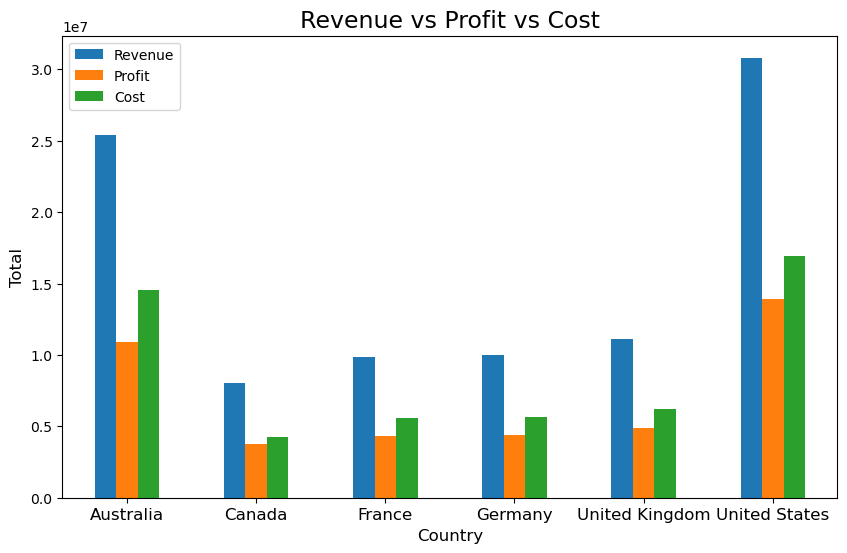

In [88]:
CPR1.plot(kind='bar',figsize=(10, 6))
plt.title("Revenue vs Profit vs Cost",fontsize=17)
plt.xlabel("Country",fontsize=12)
plt.ylabel("Total",fontsize=12)
plt.xticks(rotation = 0,fontsize = 12)

# **Highest Revenue Based on States**

In [89]:
Group_state = df.groupby('State').sum()['Revenue'].sort_values(ascending=False).head(10)
Group_state

State
California          18032833
England             11090006
New South Wales     10578395
Washington           8642489
British Columbia     7956518
Victoria             6397963
Queensland           6031003
Oregon               4012077
Saarland             2475009
Hessen               2229398
Name: Revenue, dtype: int64

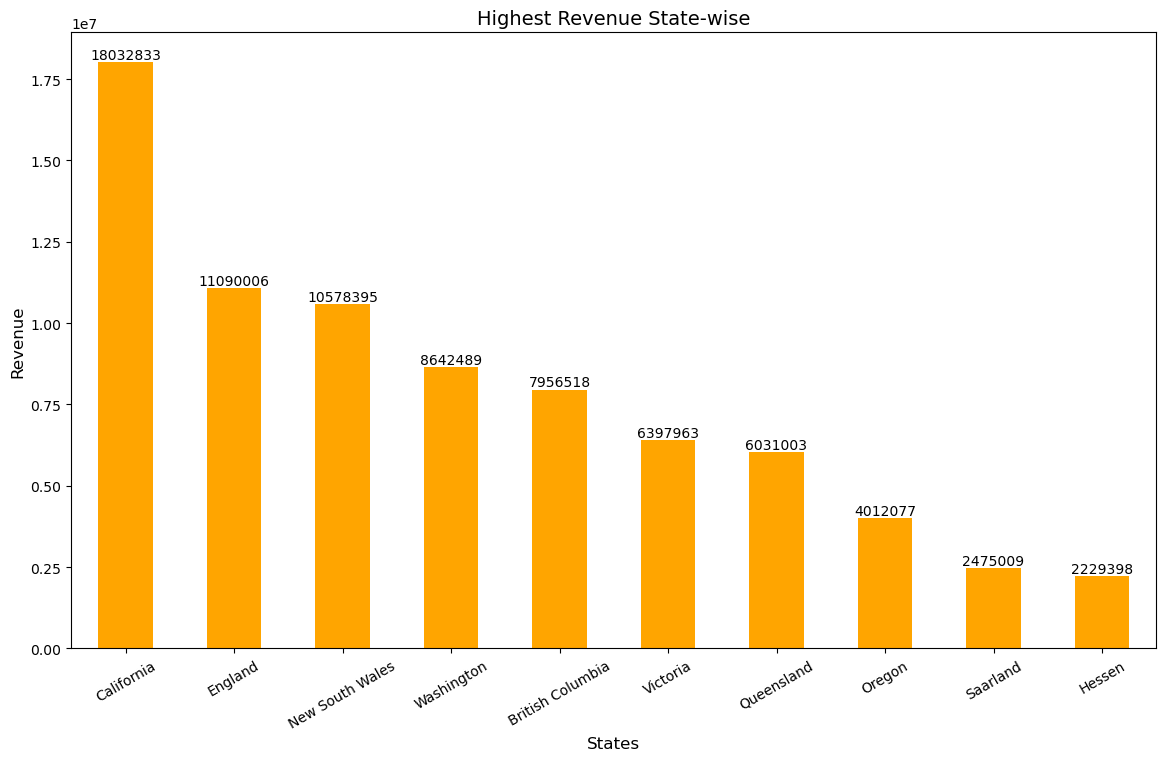

In [90]:
Group_state.plot(kind='bar', color='orange', rot=30, figsize=(14,8))

for i in range(len(Group_state)):
    plt.text(i,Group_state[i],Group_state[i],ha='center',va='bottom')
plt.title('Highest Revenue State-wise',fontsize=14)    
plt.ylabel('Revenue', fontsize = 12)
plt.xlabel('States', fontsize = 12)
plt.show()

# **Distribution of Revenue by States**

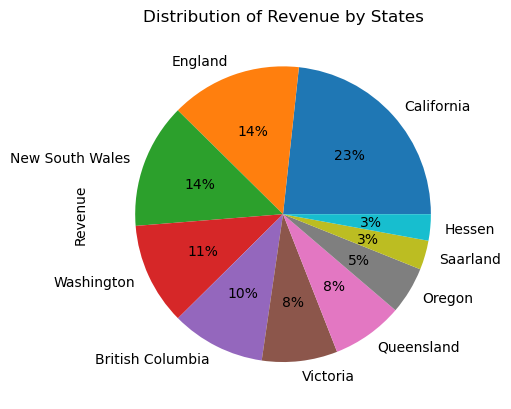

In [91]:
Group_state.plot(kind='pie', autopct='%.0f%%', title='Distribution of Revenue by States')
plt.show()

# **Profit By Product Category**

In [92]:
Group_Product = df.groupby('Product_Category').sum()['Profit'].sort_values(ascending=False)

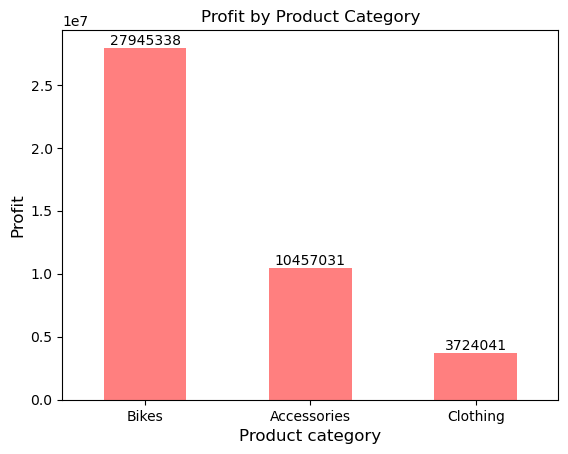

In [93]:
Group_Product.plot(kind='bar',color='red', rot=0,alpha=0.5, title='Profit by Product Category')
for i in range(len(Group_Product)):
    plt.text(i, Group_Product[i], Group_Product[i], ha='center', va = 'bottom')
plt.ylabel('Profit',fontsize=12)  
plt.xlabel('Product category',fontsize=12)
plt.show()

# **Profit By Sub-Category**

In [94]:
Group_Subcategory = df.groupby('Sub_Category').sum()['Profit'].sort_values(ascending=False)

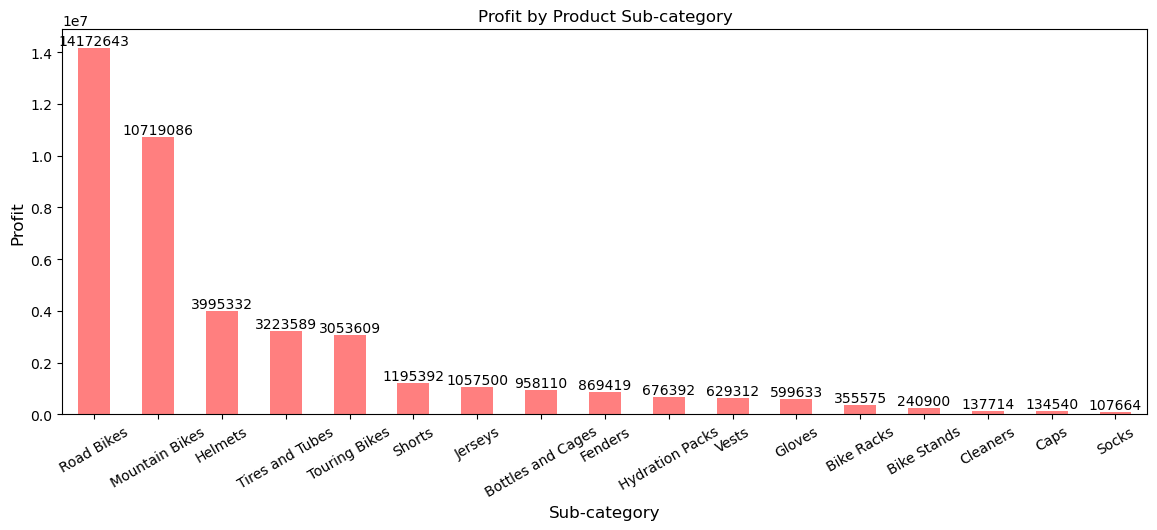

In [95]:
Group_Subcategory.plot(kind='bar',color='red', rot=30,alpha=0.5, title='Profit by Product Sub-category',figsize=(14,5))

for i in range(len(Group_Subcategory)):
    plt.text(i, Group_Subcategory[i], Group_Subcategory[i], ha='center', va = 'bottom')
    
plt.ylabel('Profit',fontsize=12)  
plt.xlabel('Sub-category',fontsize=12)
plt.show()

# Correlation

In [96]:
correlation = df.corr()

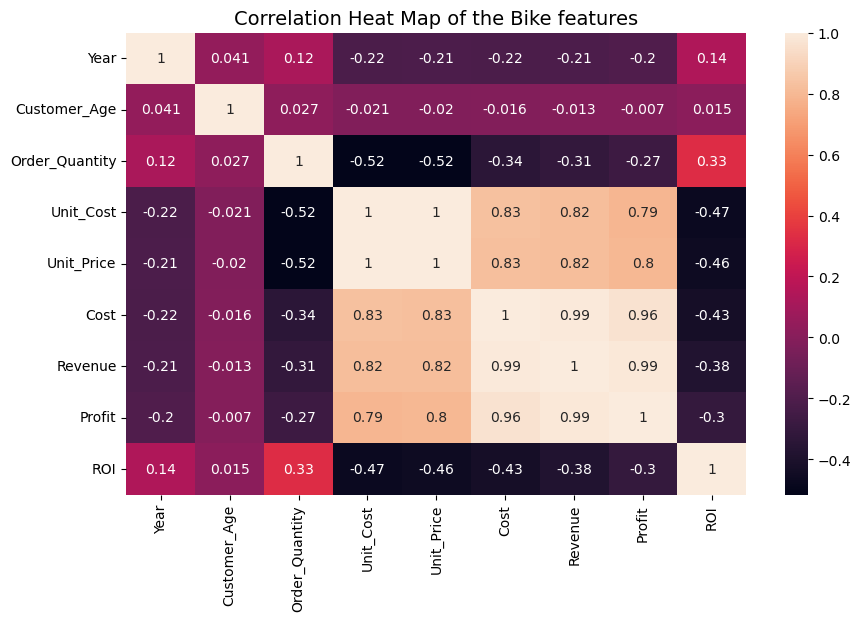

In [97]:
plt.figure(figsize = (10,6))
sns.heatmap(correlation, annot=True)
plt.title('Correlation Heat Map of the Bike features', fontsize=14)
plt.show()